In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [3]:
calories_data = pd.read_csv('calories_consumed.csv')
calories_data.head()

,Weight gained (grams),Calories Consumed
0,108,1500
1,200,2300
2,900,3400
3,200,2200
4,300,2500


In [4]:
calories_data.describe()

,Weight gained (grams),Calories Consumed
count,14.000000,14.000000
mean,357.714286,2340.714286
std,333.692495,752.109488
min,62.000000,1400.000000
25%,114.500000,1727.500000
50%,200.000000,2250.000000
75%,537.500000,2775.000000
max,1100.000000,3900.000000


### Check if there are any null values

In [5]:
calories_data.isnull().values.any()

False

In [6]:
calories_data.isnull().sum()

Weight gained (grams)    0
Calories Consumed        0
dtype: int64

## Assumptions of Linear Regression


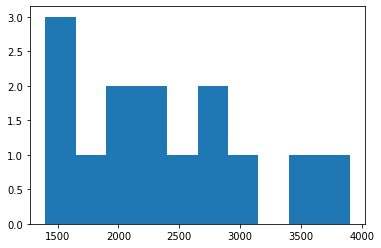

In [7]:
plt.hist(calories_data['Calories Consumed'])
plt.show()

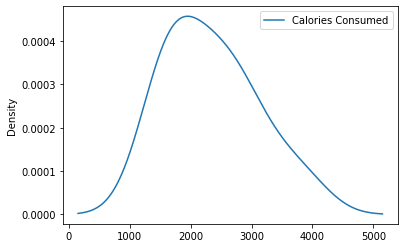

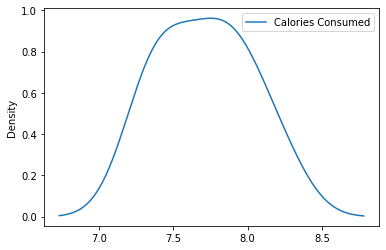

In [8]:
pd.DataFrame(calories_data['Calories Consumed']).plot.density()
pd.DataFrame(np.log(calories_data['Calories Consumed'])).plot.density()

In [8]:
from scipy.stats import skew
skew(calories_data['Calories Consumed'])

0.5825596600237767

### Check for Outliers

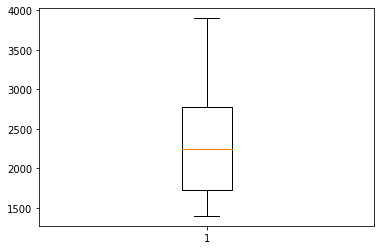

In [9]:
plt.boxplot(calories_data['Calories Consumed'])
plt.show()

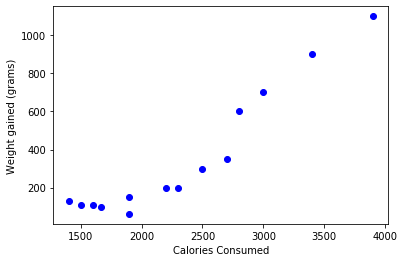

In [10]:
plt.plot(calories_data['Calories Consumed'],calories_data['Weight gained (grams)'],'bo')
plt.xlabel('Calories Consumed')
plt.ylabel('Weight gained (grams)')
plt.show()

In [11]:
calories_data['Weight gained (grams)'].corr(calories_data['Calories Consumed'])

0.9469910088554458

## Create the Model

In [18]:
import statsmodels.formula.api as smf
model = smf.ols("(calories_data['Weight gained (grams)'])~(calories_data['Calories Consumed'])",data=calories_data).fit()
print(model.summary())
print(model.conf_int(0.05))

                                      OLS Regression Results                                      
Dep. Variable:     calories_data['Weight gained (grams)']   R-squared:                       0.897
Model:                                                OLS   Adj. R-squared:                  0.888
Method:                                     Least Squares   F-statistic:                     104.3
Date:                                    Sat, 09 May 2020   Prob (F-statistic):           2.86e-07
Time:                                            17:50:54   Log-Likelihood:                -84.792
No. Observations:                                      14   AIC:                             173.6
Df Residuals:                                          12   BIC:                             174.9
Df Model:                                               1                                         
Covariance Type:                                nonrobust                                         
          

In [22]:
pred = model.predict(calories_data['Calories Consumed'])
pred

0        4.482599
1      340.607908
2      802.780209
3      298.592245
4      424.639236
5       46.498263
6      -37.533065
7      172.545254
8      550.686227
9     1012.858527
10      75.909227
11     172.545254
12     508.670563
13     634.717554
dtype: float64

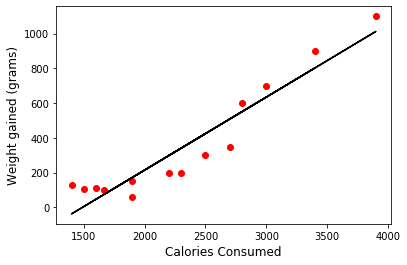

In [23]:
plt.scatter(x=calories_data['Calories Consumed'],y=calories_data['Weight gained (grams)'],color='red')
plt.plot(calories_data['Calories Consumed'],pred,color='black')
plt.xlabel('Calories Consumed',fontsize='12')
plt.ylabel('Weight gained (grams)',fontsize='12')
plt.show()